# Train a model

In [1]:
import sys
import platform
import os

print("Python version: {}".format(sys.version))
print("{}".format(platform.platform()))

Python version: 3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]
Windows-10-10.0.22621-SP0


This module loads the data generator from `dataloader.py`, creates a TensorFlow/Keras model from `model.py`, trains the model on the data, and then saves the best model.

## Training Phase!

#### Step 1: Loading the dataset from the dataloader.py

In [2]:
data_path = "Task01_BrainTumour/"

crop_dim=128  # Original resolution (240)
batch_size = 128
seed=9999
train_test_split=0.80

In [44]:
from dataloader import DatasetGenerator, get_decathlon_filelist

trainFiles, validateFiles, testFiles = get_decathlon_filelist(data_path=data_path, seed=seed, split=train_test_split)

ds_train = DatasetGenerator(trainFiles,
                            batch_size=batch_size,
                            crop_dim=[crop_dim, crop_dim], 
                            augment=True, seed=seed)

ds_validation = DatasetGenerator(validateFiles, 
                                 batch_size=batch_size, 
                                 crop_dim=[crop_dim, crop_dim], 
                                 augment=False, 
                                 seed=seed)
    
ds_test = DatasetGenerator(testFiles, 
                           batch_size=batch_size, 
                           crop_dim=[crop_dim, crop_dim], 
                           augment=False, 
                           seed=seed)


******************************
Dataset name:         BRATS
Dataset description:  Gliomas segmentation tumour and oedema in on brain images
Tensor image size:    4D
Dataset release:      2.0 04/05/2018
Dataset reference:    https://www.med.upenn.edu/sbia/brats2017.html
Dataset license:      CC-BY-SA 4.0
******************************
Number of training files   = 387
Number of validation files = 48
Number of testing files    = 49


## Plot some samples of the dataset

We can use the DatasetGenerator's plot_samples function to plot a few samples of the dataset. Note that with `augment` set to True, we have randomly cropped, flipped, and rotated the images.

(128, 128, 128, 1)


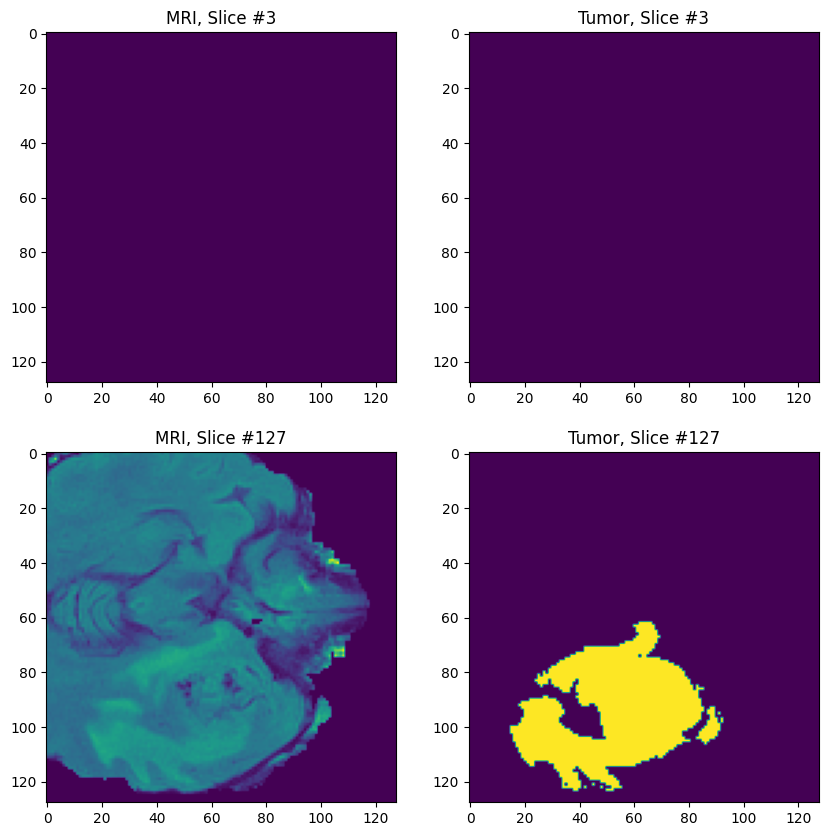

In [45]:
ds_train.plot_samples()

(128, 128, 128, 1)


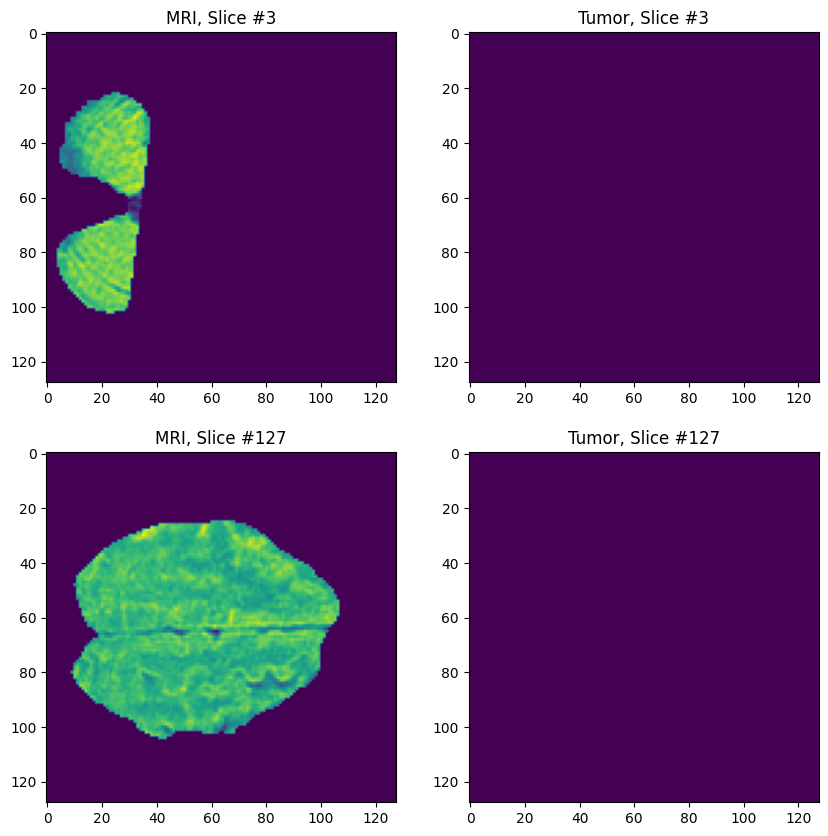

In [5]:
ds_validation.plot_samples()

#### Step 2: Define the model

In [6]:
from model import unet

from settings import *

print("-" * 30)
print("Creating and compiling model ...")
print("-" * 30)

unet_model = unet(fms=8,
                  learning_rate=1e-4,
                  use_dropout=True,
                  use_upsampling=True)

model = unet_model.create_model(
    ds_train.get_input_shape(),
    ds_train.get_output_shape())

model_filename, model_callbacks = unet_model.get_callbacks()


------------------------------
Creating and compiling model ...
------------------------------
Data format = channels_last
Using UpSampling2D
Model: "2DUNet_Brats_Decathlon"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 MRImages (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 encodeAa (Conv2D)              (None, 128, 128, 8)  80          ['MRImages[0][0]']               
                                                                                                  
 encodeAb (Conv2D)              (None, 128, 128, 8)  584         ['encodeAa[0][0]']               
                                  

The code snippet below draws the model using Keras' built-in `plot_model`. Compare with the implementation of `model.py`

#### Step 3: Train the model on the data

In [8]:
import datetime

start_time = datetime.datetime.now()

n_epoch = 20 # Train for this many epochs

history = model.fit(ds_train,
              epochs=n_epoch,
              validation_data=ds_validation,
              verbose=1,
              callbacks=model_callbacks)

print("Total time elapsed for training = {} seconds".format(datetime.datetime.now() - start_time))



Epoch 1/20
468/468 [==============================] - ETA: 0s - loss: 1.4670 - dice_coef: 0.4133 - soft_dice_coef: 0.2700
Epoch 1: val_loss improved from inf to 1.46158, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2295s 5s/step - loss: 1.4670 - dice_coef: 0.4133 - soft_dice_coef: 0.2700 - val_loss: 1.4616 - val_dice_coef: 0.2830 - val_soft_dice_coef: 0.1971
Epoch 2/20
468/468 [==============================] - ETA: 0s - loss: 0.8099 - dice_coef: 0.6133 - soft_dice_coef: 0.5334
Epoch 2: val_loss improved from 1.46158 to 0.38658, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2263s 5s/step - loss: 0.8099 - dice_coef: 0.6133 - soft_dice_coef: 0.5334 - val_loss: 0.3866 - val_dice_coef: 0.7369 - val_soft_dice_coef: 0.3728
Epoch 3/20
468/468 [==============================] - ETA: 0s - loss: 0.5407 - dice_coef: 0.6983 - soft_dice_coef: 0.3034
Epoch 3: val_loss improved from 0.38658 to 0.33951, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2254s 5s/step - loss: 0.5407 - dice_coef: 0.6983 - soft_dice_coef: 0.3034 - val_loss: 0.3395 - val_dice_coef: 0.7686 - val_soft_dice_coef: 0.3511
Epoch 4/20
468/468 [==============================] - ETA: 0s - loss: 0.4512 - dice_coef: 0.7264 - soft_dice_coef: 0.2942
Epoch 4: val_loss did not improve from 0.33951
468/468 [==============================] - 2266s 5s/step - loss: 0.4512 - dice_coef: 0.7264 - soft_dice_coef: 0.2942 - val_loss: 0.3934 - val_dice_coef: 0.6206 - val_soft_dice_coef: 0.3772
Epoch 5/20
468/468 [==============================] - ETA: 0s - loss: 0.4265 - dice_coef: 0.7285 - soft_dice_coef: 0.3286
Epoch 5: val_loss improved from 0.33951 to 0.29796, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2261s 5s/step - loss: 0.4265 - dice_coef: 0.7285 - soft_dice_coef: 0.3286 - val_loss: 0.2980 - val_dice_coef: 0.7250 - val_soft_dice_coef: 0.3715
Epoch 6/20
468/468 [==============================] - ETA: 0s - loss: 0.6781 - dice_coef: 0.6129 - soft_dice_coef: 0.3044
Epoch 6: val_loss improved from 0.29796 to 0.25760, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2263s 5s/step - loss: 0.6781 - dice_coef: 0.6129 - soft_dice_coef: 0.3044 - val_loss: 0.2576 - val_dice_coef: 0.7178 - val_soft_dice_coef: 0.3952
Epoch 7/20
468/468 [==============================] - ETA: 0s - loss: 0.3382 - dice_coef: 0.7496 - soft_dice_coef: 0.2899
Epoch 7: val_loss improved from 0.25760 to 0.23241, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2257s 5s/step - loss: 0.3382 - dice_coef: 0.7496 - soft_dice_coef: 0.2899 - val_loss: 0.2324 - val_dice_coef: 0.7808 - val_soft_dice_coef: 0.3697
Epoch 8/20
468/468 [==============================] - ETA: 0s - loss: 0.3367 - dice_coef: 0.7657 - soft_dice_coef: 0.3040
Epoch 8: val_loss did not improve from 0.23241
468/468 [==============================] - 2255s 5s/step - loss: 0.3367 - dice_coef: 0.7657 - soft_dice_coef: 0.3040 - val_loss: 0.2679 - val_dice_coef: 0.7781 - val_soft_dice_coef: 0.3670
Epoch 9/20
468/468 [==============================] - ETA: 0s - loss: 0.2892 - dice_coef: 0.7842 - soft_dice_coef: 0.3052
Epoch 9: val_loss did not improve from 0.23241
468/468 [==============================] - 2256s 5s/step - loss: 0.2892 - dice_coef: 0.7842 - soft_dice_coef: 0.3052 - val_loss: 0.2641 - val_dice_coef: 0.7824 - val_soft_dice_coef: 0.3635
Epoch 10/20
468/468 [==============================] - ETA: 0s - loss: 0.3025 - dice_coef: 0.77

INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2205s 5s/step - loss: 0.3152 - dice_coef: 0.7761 - soft_dice_coef: 0.3115 - val_loss: 0.1806 - val_dice_coef: 0.8098 - val_soft_dice_coef: 0.3955
Epoch 13/20
468/468 [==============================] - ETA: 0s - loss: 0.2879 - dice_coef: 0.8010 - soft_dice_coef: 0.3193
Epoch 13: val_loss did not improve from 0.18059
468/468 [==============================] - 2133s 5s/step - loss: 0.2879 - dice_coef: 0.8010 - soft_dice_coef: 0.3193 - val_loss: 0.2124 - val_dice_coef: 0.7905 - val_soft_dice_coef: 0.4253
Epoch 14/20
468/468 [==============================] - ETA: 0s - loss: 0.2417 - dice_coef: 0.8083 - soft_dice_coef: 0.3608
Epoch 14: val_loss did not improve from 0.18059
468/468 [==============================] - 2125s 5s/step - loss: 0.2417 - dice_coef: 0.8083 - soft_dice_coef: 0.3608 - val_loss: 0.1842 - val_dice_coef: 0.8093 - val_soft_dice_coef: 0.4132
Epoch 15/20
468/468 [==============================] - ETA: 0s - loss: 0.2822 - dice_coef: 

INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2122s 5s/step - loss: 0.2822 - dice_coef: 0.7980 - soft_dice_coef: 0.3722 - val_loss: 0.1796 - val_dice_coef: 0.8290 - val_soft_dice_coef: 0.5386
Epoch 16/20
468/468 [==============================] - ETA: 0s - loss: 0.2331 - dice_coef: 0.8147 - soft_dice_coef: 0.3994
Epoch 16: val_loss improved from 0.17961 to 0.17291, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2137s 5s/step - loss: 0.2331 - dice_coef: 0.8147 - soft_dice_coef: 0.3994 - val_loss: 0.1729 - val_dice_coef: 0.8265 - val_soft_dice_coef: 0.5031
Epoch 17/20
468/468 [==============================] - ETA: 0s - loss: 0.2449 - dice_coef: 0.8122 - soft_dice_coef: 0.4154
Epoch 17: val_loss did not improve from 0.17291
468/468 [==============================] - 2129s 5s/step - loss: 0.2449 - dice_coef: 0.8122 - soft_dice_coef: 0.4154 - val_loss: 0.1991 - val_dice_coef: 0.8241 - val_soft_dice_coef: 0.6458
Epoch 18/20
468/468 [==============================] - ETA: 0s - loss: 0.2122 - dice_coef: 0.8228 - soft_dice_coef: 0.5144
Epoch 18: val_loss improved from 0.17291 to 0.15439, saving model to ./output\2d_unet_decathlon


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


INFO:tensorflow:Assets written to: ./output\2d_unet_decathlon\assets


468/468 [==============================] - 2130s 5s/step - loss: 0.2122 - dice_coef: 0.8228 - soft_dice_coef: 0.5144 - val_loss: 0.1544 - val_dice_coef: 0.8489 - val_soft_dice_coef: 0.6305
Epoch 19/20
468/468 [==============================] - ETA: 0s - loss: 0.2227 - dice_coef: 0.8244 - soft_dice_coef: 0.5184
Epoch 19: val_loss did not improve from 0.15439
468/468 [==============================] - 2124s 5s/step - loss: 0.2227 - dice_coef: 0.8244 - soft_dice_coef: 0.5184 - val_loss: 0.1872 - val_dice_coef: 0.8115 - val_soft_dice_coef: 0.4755
Epoch 20/20
468/468 [==============================] - ETA: 0s - loss: 0.2057 - dice_coef: 0.8292 - soft_dice_coef: 0.5974
Epoch 20: val_loss did not improve from 0.15439
468/468 [==============================] - 2129s 5s/step - loss: 0.2057 - dice_coef: 0.8292 - soft_dice_coef: 0.5974 - val_loss: 0.1782 - val_dice_coef: 0.8185 - val_soft_dice_coef: 0.4872
Total time elapsed for training = 12:14:59.498623 seconds


In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

dice_coef = history.history['dice_coef']
val_dice_coef = history.history['val_dice_coef']

In [17]:
font = {'fontname':'Monaco'}

import matplotlib.font_manager as font_manager
nfont = font_manager.FontProperties(family='Monaco',
                                   weight='normal',
                                   style='normal', size=13)

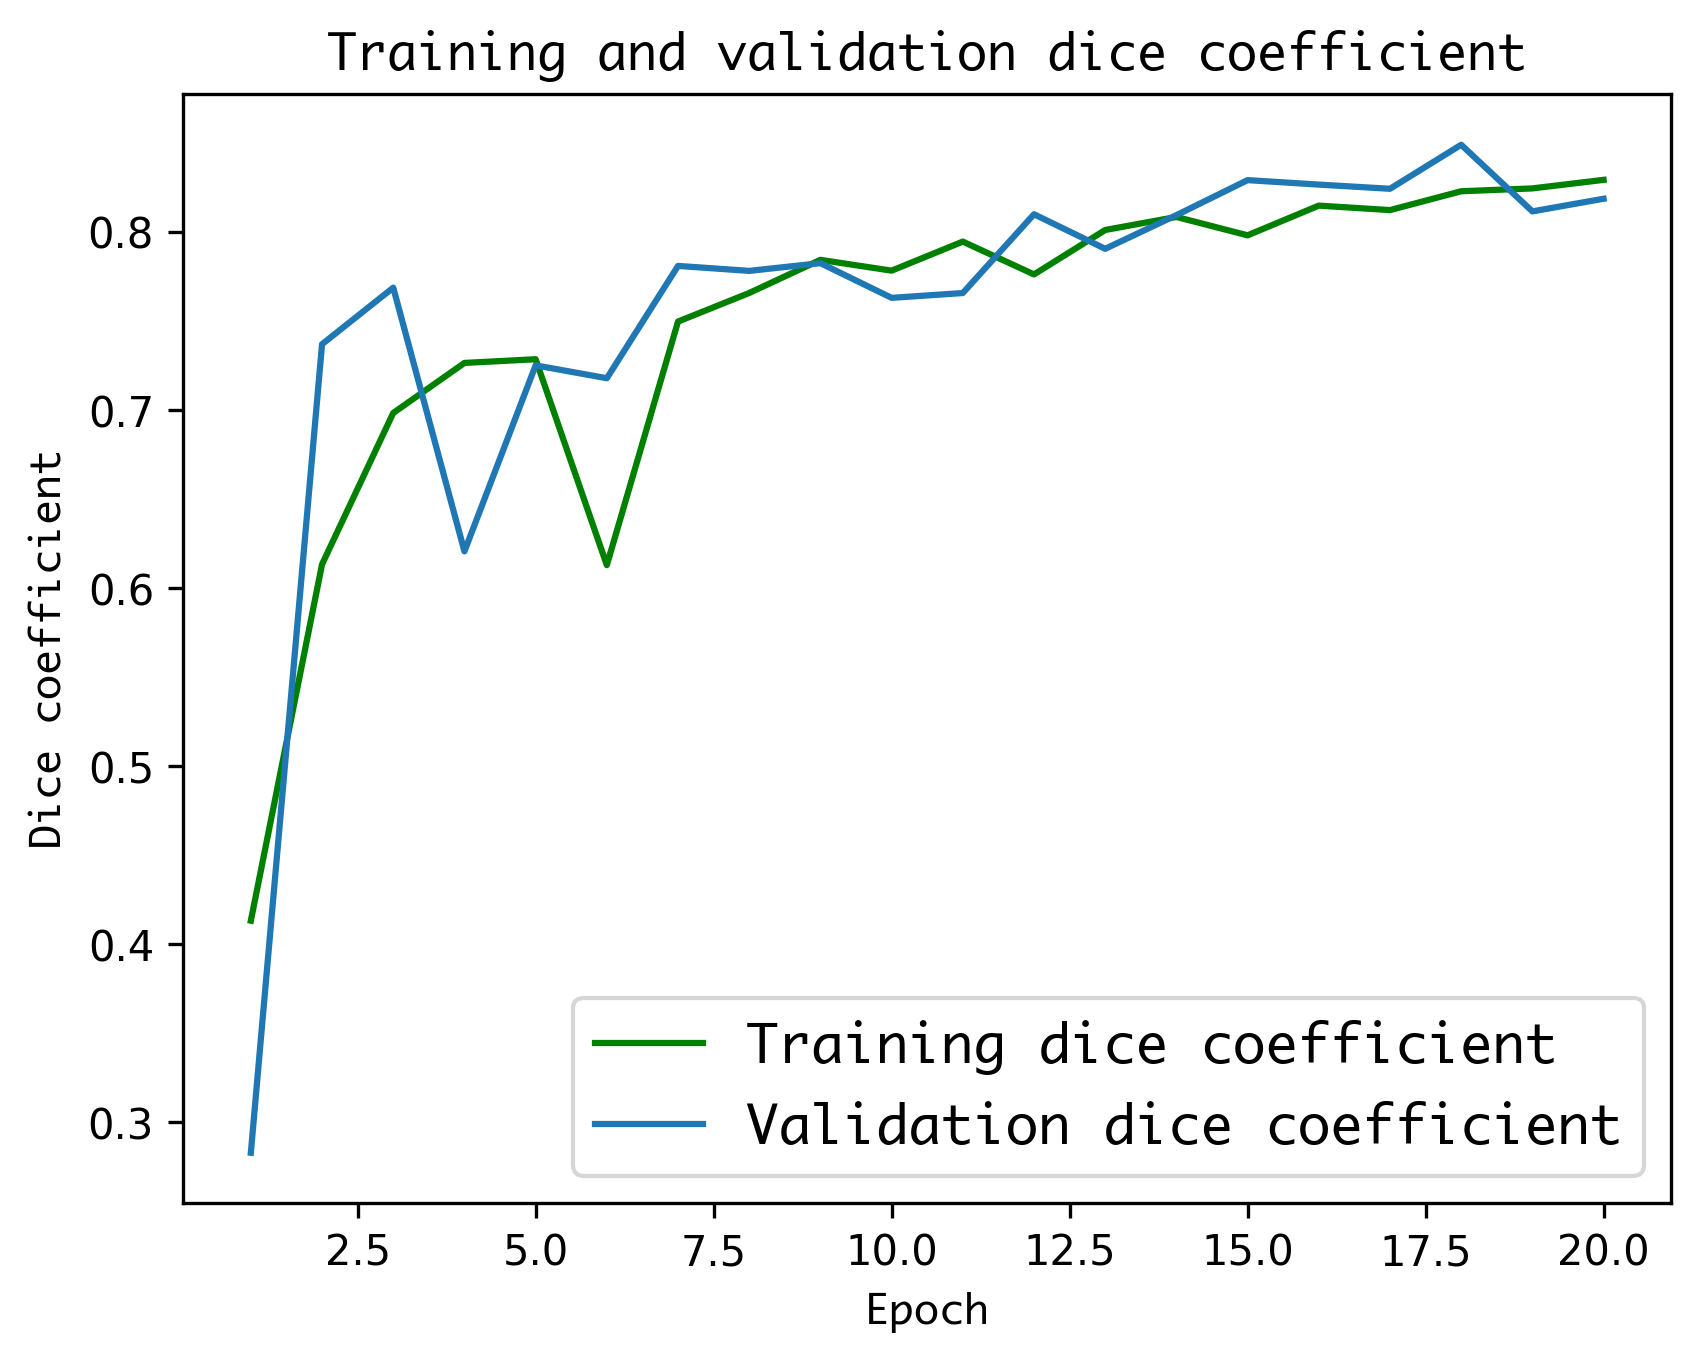

In [41]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.figure(dpi=300)

plt.plot(epochs, dice_coef, '-', label="Training dice coefficient", color="green", markevery=1)
plt.plot(epochs, val_dice_coef, '-', label="Validation dice coefficient")

plt.xlabel('Epoch', **font)
plt.ylabel('Dice coefficient', **font)
plt.legend(prop=nfont)
plt.title('Training and validation dice coefficient', **font)

plt.show()

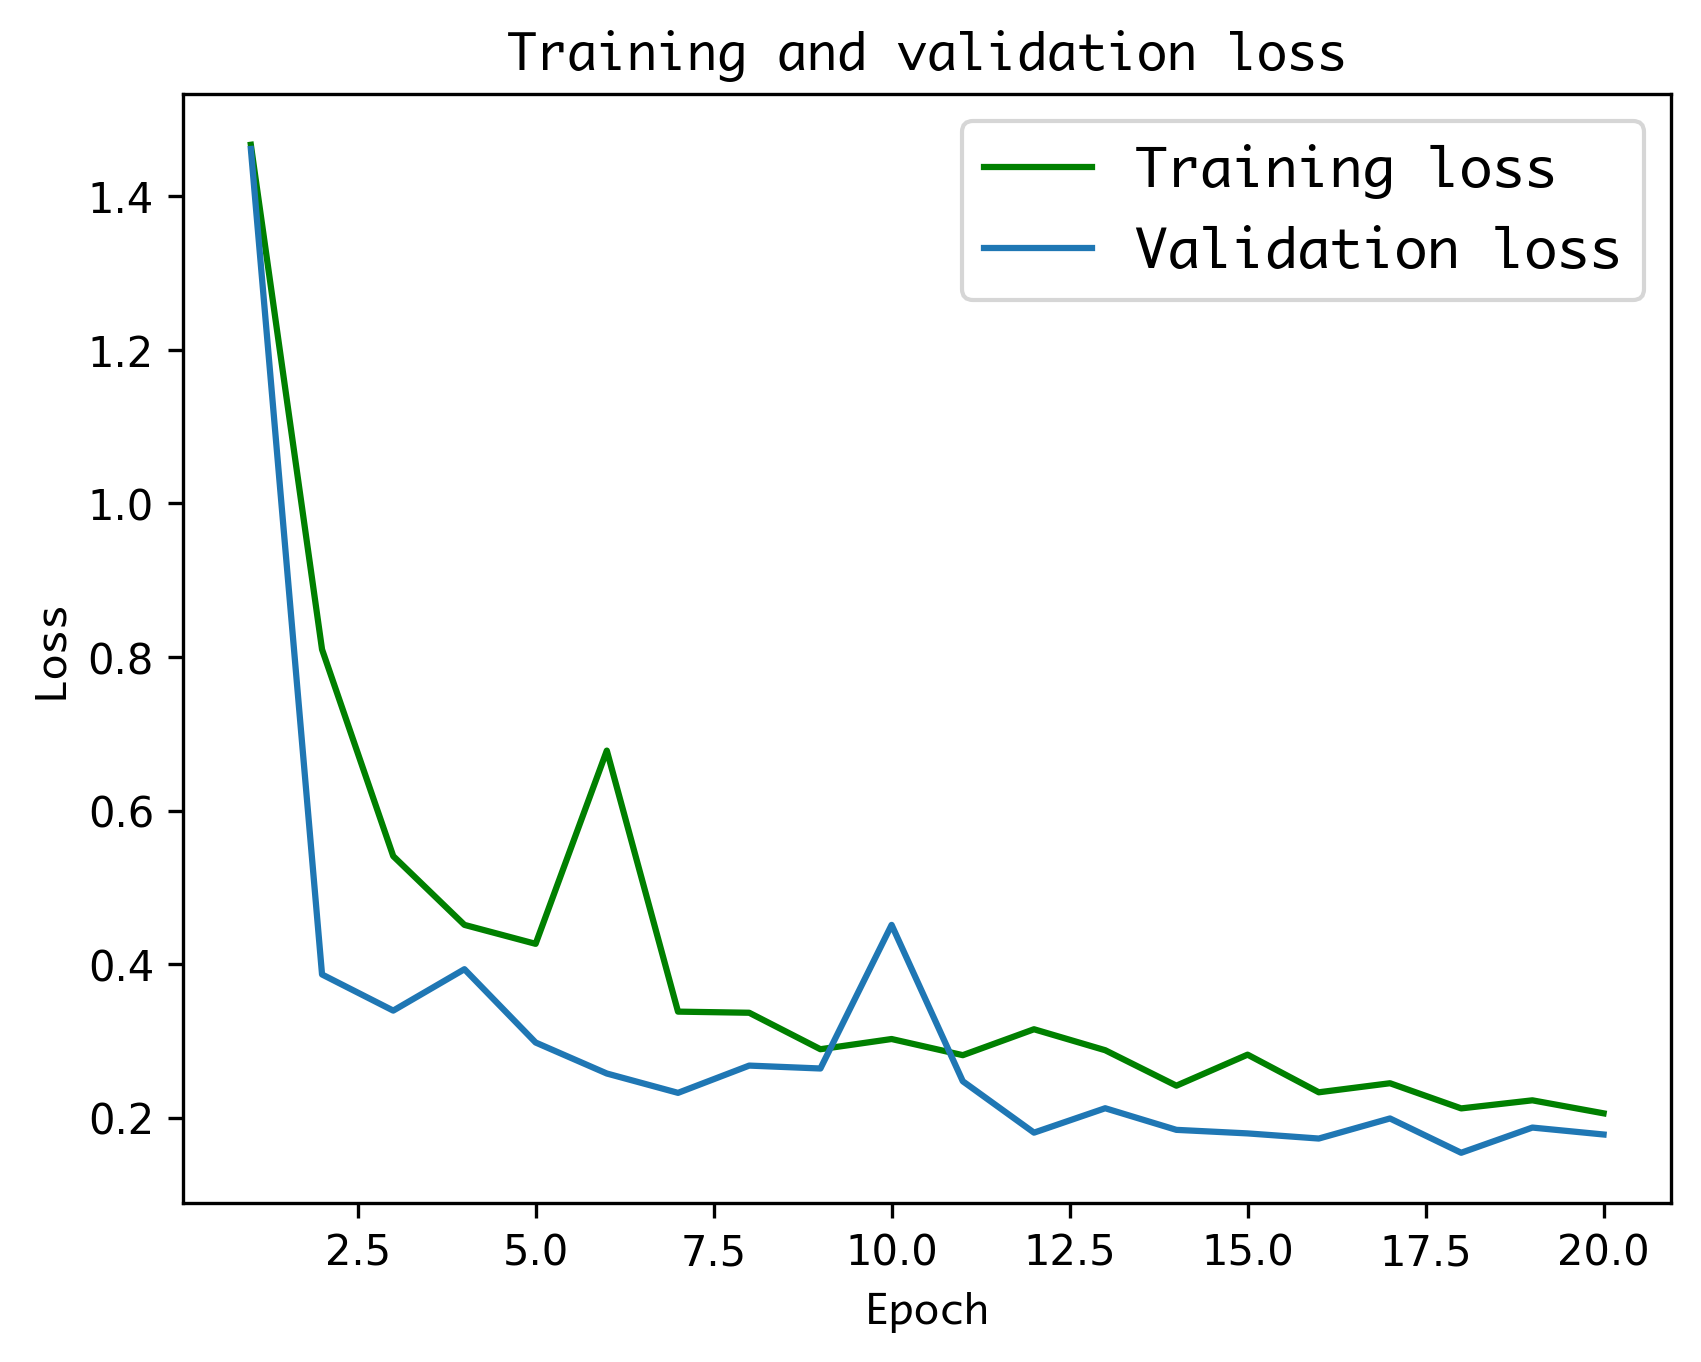

In [43]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.figure(dpi=300)

plt.plot(epochs, loss, '-', label="Training loss", color="green", markevery=1)
plt.plot(epochs, val_loss, '-', label="Validation loss")

plt.xlabel('Epoch', **font)
plt.ylabel('Loss', **font)
plt.legend(prop=nfont)
plt.title('Training and validation loss', **font)

plt.show()

#### Step 4: Evaluate the best model

In [12]:
print("-" * 30)
print("Loading the best trained model ...")
print("-" * 30)
unet_model.evaluate_model(model_filename, ds_test)

------------------------------
Loading the best trained model ...
------------------------------
Evaluating model on test dataset. Please wait...
59/59 [==============================] - 71s 1s/step - loss: 0.1913 - dice_coef: 0.8292 - soft_dice_coef: 0.6241
Test dataset loss = 0.1913
Test dataset dice_coef = 0.8292
Test dataset soft_dice_coef = 0.6241
